# Análisis y Predicción de Ventas en una Tienda de Retail (Core)

## Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización

En esta cuarta parte del proyecto, aplicaremos técnicas avanzadas de análisis exploratorio de datos (EDA) y visualización para comprender mejor el conjunto de datos de ventas de la tienda de retail. Utilizaremos Python, Pandas y Matplotlib para explorar y visualizar los datos, identificar patrones y tendencias, y preparar los datos para un análisis más profundo.

### Instrucciones

#### 1. Continuar desde la Parte III

* Asegúrate de tener el repositorio de GitHub clonado localmente y el dataset ya limpiado y preparado desde la Parte III.

#### 2. Análisis Descriptivo y Visualización

* Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
* Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
* Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
* Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

#### 3. Generar un Pull Request en GitHub

* Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub y genera un Pull Request (PR) para revisión.

## Resolución Parte III

### Carga de Datos

Se procede a cargar los datos desde el punto en que quedó en la parte 2.

In [1]:
import pandas as pd

camino_dataset = "../data/retail_sales_dataset.csv"

df = pd.read_csv(camino_dataset)

# Genera estadísticas descriptivas del DataFrame utilizando el método describe().
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [2]:
# Análisis de coeficiente de variación
from utils import variation_coefficient

df[["Age", "Quantity", "Price per Unit", "Total Amount"]].agg(["mean", "std", variation_coefficient])

,Age,Quantity,Price per Unit,Total Amount
mean,41.392000,2.514000,179.890000,456.000000
std,13.681430,1.132734,189.681356,559.997632
variation_coefficient,0.330533,0.450571,1.054430,1.228065


De estos datos, se puede determinar que la media no es un factor relevante para Quantity, Price per Unit, Total Amount. Podría influir en el caso de la edad, pero se determinaría más adelante.

Finalmente, también se analiza si existen datos nulos, en caso de que sirva para más adelante.

In [3]:
from utils import obtener_estadisticas_datos_nulos

df_estadisticas = obtener_estadisticas_datos_nulos(df)

df_estadisticas

,datos sin NAs en q,Na en q,Na en %
Transaction ID,1000,0,0.0
Date,1000,0,0.0
Customer ID,1000,0,0.0
Gender,1000,0,0.0
Age,1000,0,0.0
Product Category,1000,0,0.0
Quantity,1000,0,0.0
Price per Unit,1000,0,0.0
Total Amount,1000,0,0.0


Al parecer, no existe ningún dato nulo en el dataset.

### Transformación y Agregación


Ya existe la columna de Total Amount, pero de igual manera se agregará una nueva columna y se calculará la diferencia respecto a la columna disponible en el dataset. Esto servirá también para ver si coinciden los valores de precio por unidad y cantidades vs el monto total por venta.

In [4]:
df["Calculated Total Amount"] = df["Price per Unit"] * df["Quantity"]

df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Calculated Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,200


Para analizar si hay una diferencia significativa entre la columna calculada y la columna de total original, se pueden restar ambas y sacar estadísticas (promedio, desviación estándar).

In [5]:
diferencia = abs(df["Total Amount"] - df["Calculated Total Amount"])

diferencia.agg(["mean", "std", "min", "max"])

mean    0.0
std     0.0
min     0.0
max     0.0
dtype: float64

Según las estadísticas de la columna, no existe ninguna diferencia entre la columna calculada y la del dataset.

Se procede a clasificar las ventas. Para esto, se toma el maximo y el mínimo de la columna Total Amount, se resta y la diferencia se divide entre 3

In [6]:
min_ventas = df["Total Amount"].min()
max_ventas = df["Total Amount"].max()

print(f"Valor mínimo de ventas: {min_ventas}")
print(f"Valor máximo de ventas: {max_ventas}")

diferencia = max_ventas - min_ventas

print(f"Diferencia entre max. y min.: {diferencia}")

inicio_bajas = min_ventas
# El límite de ventas bajas iría de min_ventas a limite_bajas, la cual cubre el tercio mas bajo de la diferencia.
limite_bajas = min_ventas + (float(diferencia) / 3)
# El límite de ventas medias iría de min_ventas a limite_bajas, la cual cubre el tercio mas bajo de la diferencia.
limite_medias = limite_bajas + (float(diferencia) / 3)
# El límite de ventas altas iría de limite_medias a max_ventas, la cual cubre el tercio mas bajo de la diferencia.
# También es posible usar aquí una suma similar a los otros grupos, solo que para evitar diferencias
# mínimas debido al uso de decimales, es mejor usar nada más ya max_ventas
limite_altas = max_ventas

print(f"Rango de ventas bajas: De {inicio_bajas} a {limite_bajas:.2f}")
print(f"Rango de ventas medias: De {limite_bajas:.2f} a {limite_medias:.2f}")
print(f"Rango de ventas altas: De {limite_medias:.2f} a {limite_altas}")

Valor mínimo de ventas: 25
Valor máximo de ventas: 2000
Diferencia entre max. y min.: 1975
Rango de ventas bajas: De 25 a 683.33
Rango de ventas medias: De 683.33 a 1341.67
Rango de ventas altas: De 1341.67 a 2000


Por tanto, se crean tres grupos:

* Primer grupo (Baja)
* Segundo grupo (Media)
* Tercer grupo (Alta)

Estos grupos se incorporarán como una columna categórica en el conjunto de datos. El límite inferior de cada grupo es inclusivo, mientras que el límite superior es exclusivo.

In [7]:
def funcion_clasificacion(x):
    if inicio_bajas <= x["Total Amount"] < limite_bajas:
        return "Baja"
    elif limite_bajas <= x["Total Amount"] < limite_medias:
        return "Media"
    elif limite_medias <= x["Total Amount"]:
        return "Alta"


df["Sale Classification"] = df.apply(funcion_clasificacion, axis=1)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Calculated Total Amount,Sale Classification
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Media
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Baja
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50,Baja
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,90,Baja
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,100,Baja
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150,Baja


### Agrupación y Agregación

Se procede a agregar los grupos y a analizar los datos con agregaciones.

##### Agrupación y Agregación por Género

In [8]:
df.groupby("Gender")["Total Amount"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Gender,,,,,
Female,456.549020,554.299371,25,2000,1.214107
Male,455.428571,566.433809,25,2000,1.243738


In [9]:
df.groupby("Gender")["Age"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Gender,,,,,
Female,41.356863,13.568067,18,64,0.328073
Male,41.428571,13.812208,18,64,0.333398


##### Agrupación y Agregación por Product Category

In [10]:
df.groupby("Product Category")["Total Amount"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Product Category,,,,,
Beauty,467.475570,563.612788,25,2000,1.205652
Clothing,443.247863,550.695917,25,2000,1.242411
Electronics,458.786550,567.540150,25,2000,1.237046


In [11]:
df.groupby("Product Category")["Age"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Product Category,,,,,
Beauty,40.371336,13.889817,18,64,0.344051
Clothing,41.948718,13.498262,18,64,0.321780
Electronics,41.736842,13.669573,18,64,0.327518


#### Agrupación y Agregación por Sale Classification.

In [12]:
df.groupby("Sale Classification")["Total Amount"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Sale Classification,,,,,
Alta,1747.474747,251.259454,1500,2000,0.143784
Baja,154.076087,157.650788,25,600,1.023201
Media,1027.878788,127.158380,900,1200,0.123710


En esta agrupación, se puede notar que el coeficiente de variación para las categorías alta y media son menores al 30%, por lo cual tal vez sea útil el promedio en estos casos.

In [13]:
df.groupby("Sale Classification")["Age"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Sale Classification,,,,,
Alta,39.202020,13.616451,18,64,0.347341
Baja,41.841033,13.694251,18,64,0.327292
Media,40.703030,13.589462,18,64,0.333869


### Análisis personalizado con apply.

Ya se realizó un apply previamente, pero se agrega también la columna de diferencia con desviación estandar de las ventas.

In [14]:
std_dev = df["Total Amount"].std()

print(f"Desviación estándar {std_dev}")

df["Total Amount Stdev Difference"] = df.apply(lambda x: abs(x["Total Amount"] - std_dev), axis=1)
df

Desviación estándar 559.997631555123


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Calculated Total Amount,Sale Classification,Total Amount Stdev Difference
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja,409.997632
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Media,440.002368
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja,529.997632
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Baja,59.997632
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja,459.997632
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50,Baja,509.997632
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,90,Baja,469.997632
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,100,Baja,459.997632
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150,Baja,409.997632


# Resolución Parte IV

### Análisis Descriptivo y Visualización

#### Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
Age,1000.0,41.392000,13.681430,18.000000,29.000000,42.000000,53.000000,64.000000
Quantity,1000.0,2.514000,1.132734,1.000000,1.000000,3.000000,4.000000,4.000000
Price per Unit,1000.0,179.890000,189.681356,25.000000,30.000000,50.000000,300.000000,500.000000
Total Amount,1000.0,456.000000,559.997632,25.000000,60.000000,135.000000,900.000000,2000.000000
Calculated Total Amount,1000.0,456.000000,559.997632,25.000000,60.000000,135.000000,900.000000,2000.000000
Total Amount Stdev Difference,1000.0,496.319048,279.006281,40.002368,359.997632,469.997632,529.997632,1440.002368


Calculamos el coeficiente de variación para determinar si los promedios son útiles.

In [16]:
from utils import obtener_estadisticas_descriptivas_df_es


df_estadisticas = obtener_estadisticas_descriptivas_df_es(df, 2)
df_estadisticas.T

,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Transaction ID,1.0,1000.0,500.50,288.82,500.5,0.58
Age,18.0,64.0,41.39,13.68,42.0,0.33
Quantity,1.0,4.0,2.51,1.13,3.0,0.45
Price per Unit,25.0,500.0,179.89,189.68,50.0,1.05
Total Amount,25.0,2000.0,456.00,560.00,135.0,1.23
Calculated Total Amount,25.0,2000.0,456.00,560.00,135.0,1.23
Total Amount Stdev Difference,40.0,1440.0,496.32,279.01,470.0,0.56


Se puede notar que ninguna columna tiene un promedio útil si tenemos en cuenta que el coeficiente de variación de todas las columnas es mayor al 30% (0.30)

#### Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

##### Histogramas

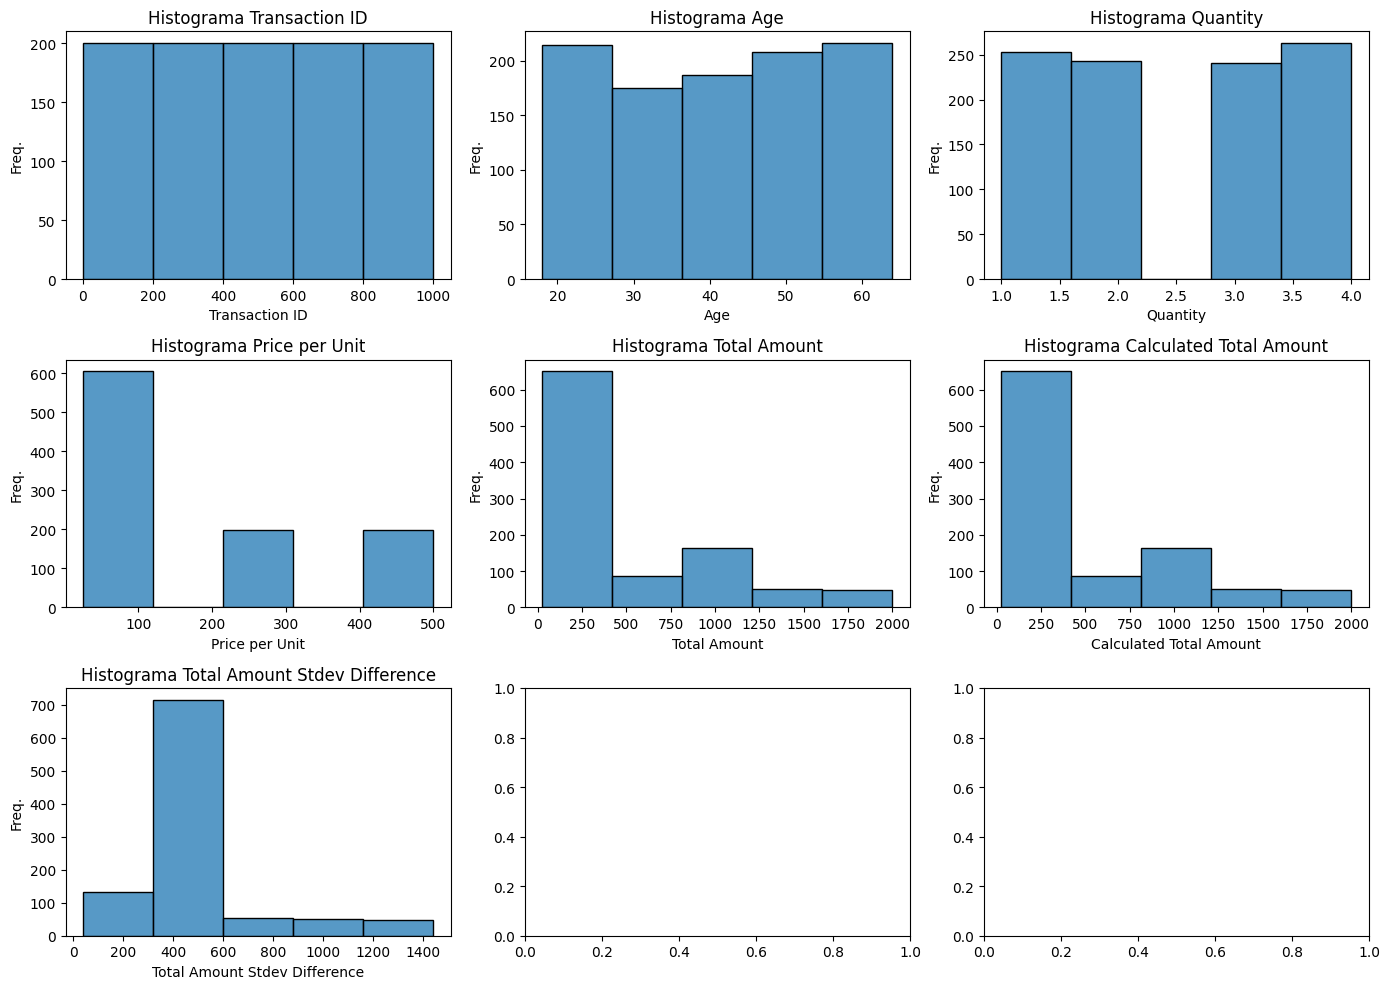

In [17]:
from utils import obtener_columnas_numericas_df, graficar_histogramas

columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas)

##### Boxplots

['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Calculated Total Amount', 'Total Amount Stdev Difference']


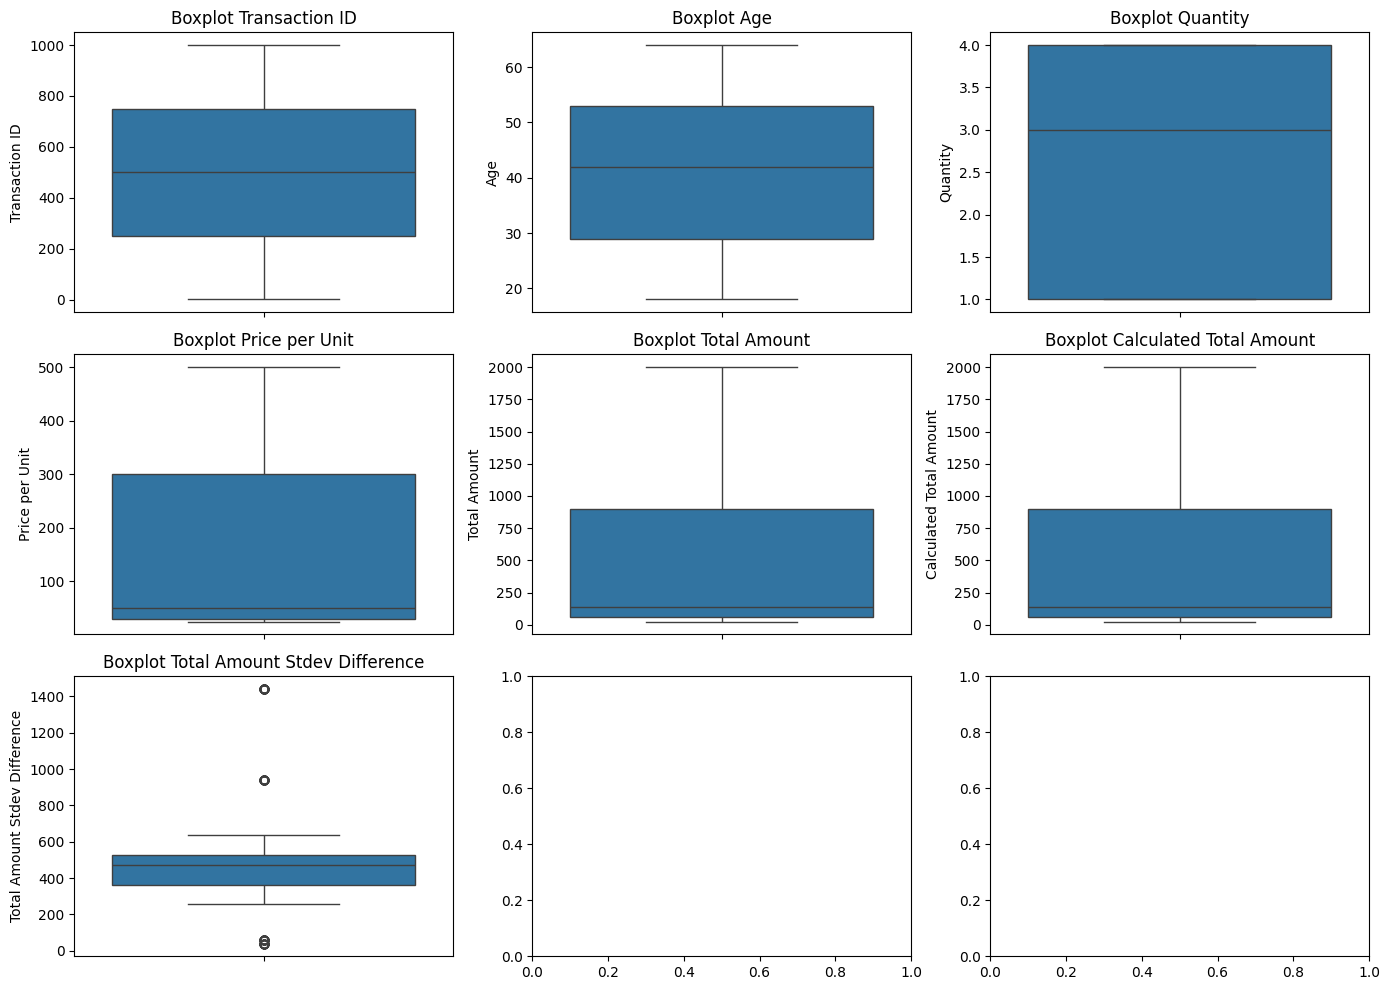

In [18]:
from utils import graficar_boxplots

print(columnas_numericas)

graficar_boxplots(df, columnas_numericas)

#### Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

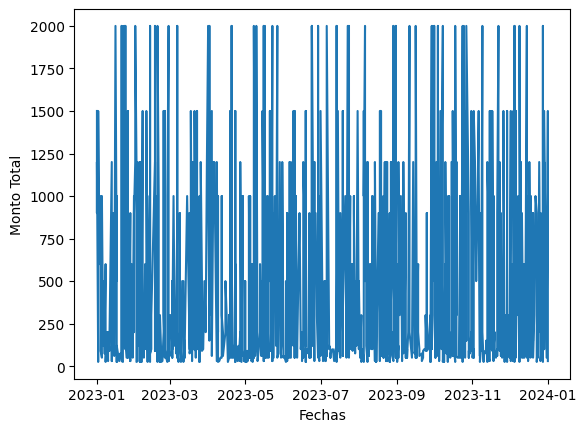

In [19]:
import matplotlib.pyplot as plt


df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", inplace=True)

tiempos = pd.to_datetime(df["Date"])
ventas = df["Total Amount"]

plt.plot(tiempos, ventas)
plt.xlabel("Fechas")
plt.ylabel("Monto Total")
plt.show()

Se puede notar que hay una distribución muy desigual de ventas por día. Por lo cual, sería interesante agrupar solo por fecha y ver la evolución de las ventas totales por día.

In [20]:
df_agrupado_suma_fechas = df.groupby("Date")["Total Amount"].sum("Total Amount").reset_index()

df_agrupado_suma_fechas

,Date,Total Amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100
...,...,...
340,2023-12-27,700
341,2023-12-28,2075
342,2023-12-29,3400
343,2023-12-31,50


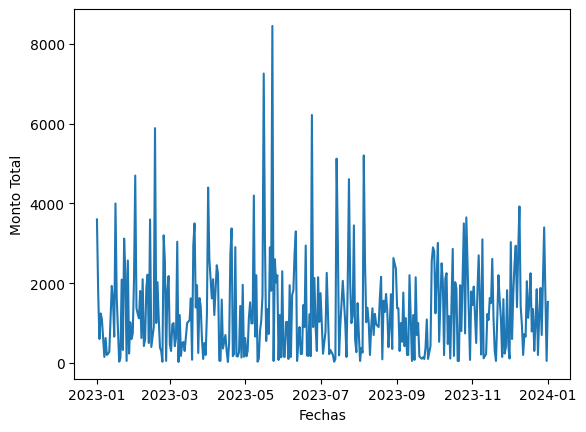

In [21]:
fechas = df_agrupado_suma_fechas["Date"]
cantidades = df_agrupado_suma_fechas["Total Amount"]

plt.plot(fechas, cantidades)
plt.xlabel("Fechas")
plt.ylabel("Monto Total")
plt.show()

##### Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

Gráfico de dispersión analizando Edad de cliente vs venta total

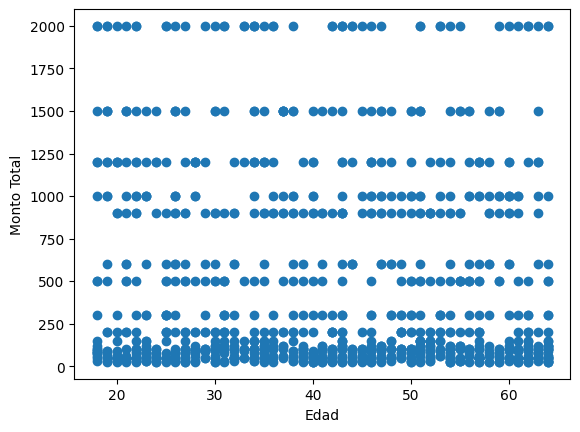

In [22]:
plt.scatter(df["Age"], df["Total Amount"])
plt.xlabel("Edad")
plt.ylabel("Monto Total")
plt.show()

Como se puede ver, no hay mucha relación entre ambas columnas.

A continuación, se investiga la dispersión de la columna de precio por unidad vs cantidad adquirida.

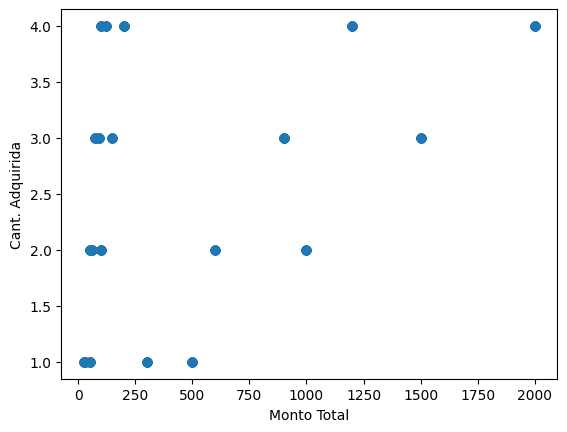

In [23]:
plt.scatter(df["Total Amount"], df["Quantity"])
plt.xlabel("Monto Total")
plt.ylabel("Cant. Adquirida")
plt.show()

##### Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

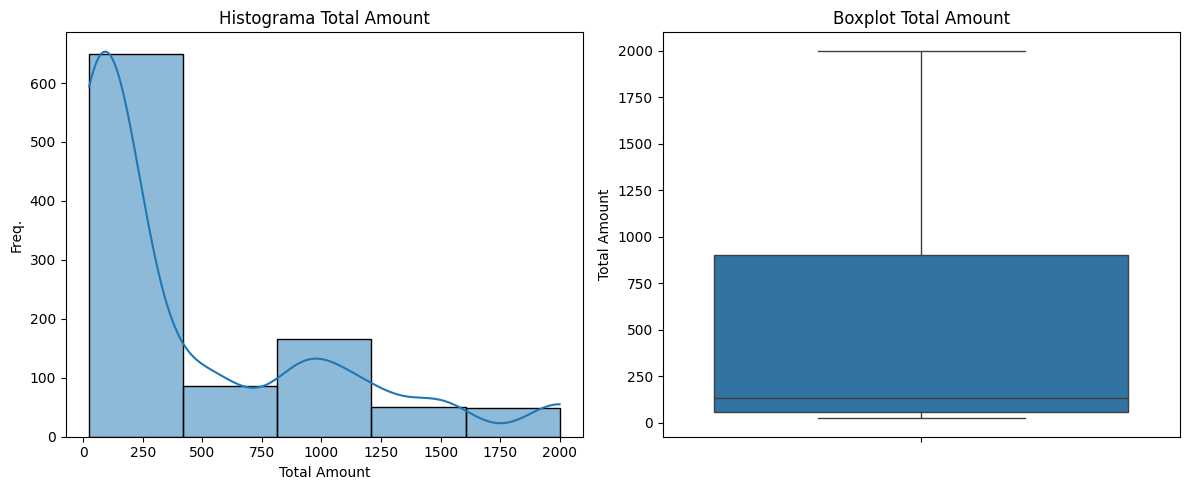

In [24]:
from utils import graficar_histograma_y_boxplot

graficar_histograma_y_boxplot(df["Total Amount"], "Total Amount")

De ambos gráficos, se puede notar que la mayoría de ventas se concentra entre un total de 0 a 1000 usd, siendo valores superiores anómalos.